In [25]:
import wandb
import pandas as pd
import numpy as np
import seaborn as sns
api = wandb.Api()


In [57]:
metrics = []
for run in api.runs(
    "cnut1648/seq", filters={"tags": "MC-ATTN"}
):
    if "valid/epoch/AUPRC" in run.summary:
        auprc = run.summary["valid/epoch/AUPRC"]['best']
    else:
        auprc = np.nan
    metrics.extend([
        {
            "TYPE": "AUROC",
            "METRIC": run.summary["valid/epoch/AUROC"]['best'],
            "TAG": "ATTN"
        },
        {
            "TYPE": "AUPRC",
            "METRIC": auprc,
            "TAG": "ATTN"
        },
    ])

for run in api.runs(
    "cnut1648/seq", filters={"tags": "MC-COMB"}
):
    if "valid/epoch/AUPRC" in run.summary:
        auprc = run.summary["valid/epoch/AUPRC"]['best']
    else:
        auprc = np.nan
    metrics.extend([
        {
            "TYPE": "AUROC",
            "METRIC": run.summary["valid/epoch/AUROC"]['best'],
            "TAG": "COMB"
        },
        {
            "TYPE": "AUPRC",
            "METRIC": auprc,
            "TAG": "COMB"
        },
    ])



In [58]:
clinical = pd.read_csv(
    "/home/jiashu/seq/scripts/clinic_only/19990615.txt",
    sep="\t", header=None, names=["AUROC", "AUPRC"]
).iloc[:100, :]
for i, row in clinical.iterrows():
    metrics.extend([
        {
            "TYPE": "AUROC",
            "METRIC": row["AUROC"],
            "TAG": "CLINICAL"
        },
        {
            "TYPE": "AUPRC",
            "METRIC": row["AUPRC"],
            "TAG": "CLINICAL"
        },
    ])

In [62]:
df = pd.DataFrame(metrics)
df

,TYPE,METRIC,TAG
0,AUROC,0.791667,ATTN
1,AUPRC,1.000000,ATTN
2,AUROC,0.800000,ATTN
3,AUPRC,0.803571,ATTN
4,AUROC,1.000000,ATTN
...,...,...,...
595,AUPRC,0.778571,CLINICAL
596,AUROC,0.583333,CLINICAL
597,AUPRC,0.758333,CLINICAL
598,AUROC,0.800000,CLINICAL


In [68]:
df.to_csv("data.csv", index=False)

In [69]:
pd.read_csv("data.csv",)

,TYPE,METRIC,TAG
0,AUROC,0.791667,ATTN
1,AUPRC,1.000000,ATTN
2,AUROC,0.800000,ATTN
3,AUPRC,0.803571,ATTN
4,AUROC,1.000000,ATTN
...,...,...,...
595,AUPRC,0.778571,CLINICAL
596,AUROC,0.583333,CLINICAL
597,AUPRC,0.758333,CLINICAL
598,AUROC,0.800000,CLINICAL


In [54]:
df.query("TAG == 'ATTN' & TYPE == 'AUPRC'").mean()

METRIC    0.918026
dtype: float64

In [55]:
df.query("TAG == 'ATTN' & TYPE == 'AUROC'").mean()

METRIC    0.808654
dtype: float64

<AxesSubplot:xlabel='TAG', ylabel='METRIC'>

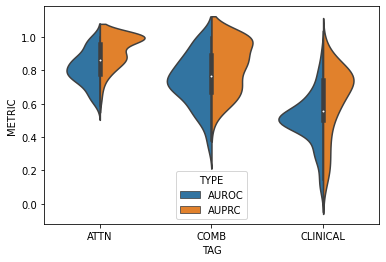

In [63]:
sns.violinplot(
    x="TAG", y="METRIC", 
    hue="TYPE", split=True,
    data=df
)

<AxesSubplot:>

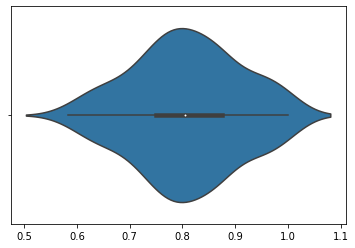

In [3]:
sns.violinplot(x=metrics)